In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
df = pd.read_csv('Data Set/price-range-of-hdb-flats-offered.csv')

In [241]:
df

,financial_year,town,room_type,min_selling_price,max_selling_price,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg
0,2008,Punggol,2-room,82000,107000,0,0
1,2008,Punggol,3-room,135000,211000,0,0
2,2008,Punggol,4-room,223000,327000,0,0
3,2008,Punggol,5-room,305000,428000,0,0
4,2008,Jurong West,3-room,142000,160000,0,0
...,...,...,...,...,...,...,...
228,2019,Tengah,5-room,409000,510000,364000,465000
229,2019,Woodlands,2-room,86000,128000,6000,48000
230,2019,Woodlands,3-room,165000,194000,90000,119000
231,2019,Woodlands,4-room,244000,295000,184000,235000


In [242]:
df.isnull().sum()

financial_year                    0
town                              0
room_type                         0
min_selling_price                 0
max_selling_price                 0
min_selling_price_less_ahg_shg    0
max_selling_price_less_ahg_shg    0
dtype: int64

In [243]:
df.drop(df[df['min_selling_price'] == 0].index, inplace=True)

In [286]:
df[df['min_selling_price'] == 0]

,financial_year,town,room_type,min_selling_price,max_selling_price,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg
128,2014,Sembawang,5-room,0,0,0,0
132,2014,Sengkang,5-room,0,0,0,0
148,2015,Sembawang,5-room,0,0,0,0
168,2016,Yishun,5-room,0,0,0,0
176,2017,Choa Chu Kang,5-room,0,0,0,0
177,2017,Punggol,2-room,0,0,0,0
178,2017,Punggol,3-room,0,0,0,0
201,2018,Sembawang,2-room,0,0,0,0


In [245]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
financial_year,225.0,2013.537778,3.423872,2008.0,2011.0,2013.0,2017.0,2019.0
min_selling_price,225.0,202542.222222,90661.749910,68000.0,134000.0,203000.0,274000.0,423000.0
max_selling_price,225.0,269213.333333,112767.573860,94000.0,172000.0,266000.0,365000.0,551000.0
min_selling_price_less_ahg_shg,225.0,140413.333333,120568.714848,0.0,13000.0,114000.0,232000.0,392000.0
max_selling_price_less_ahg_shg,225.0,198568.893333,151518.617743,0.0,60000.0,168000.0,315000.0,506000.0


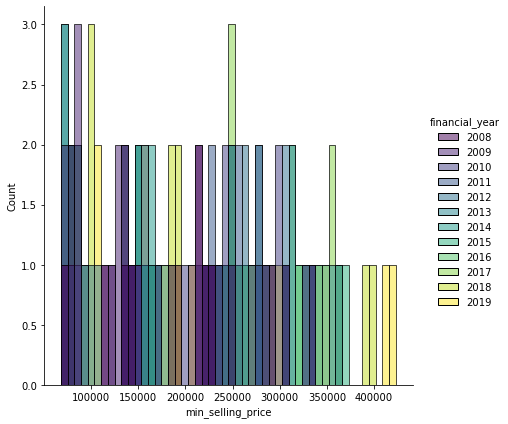

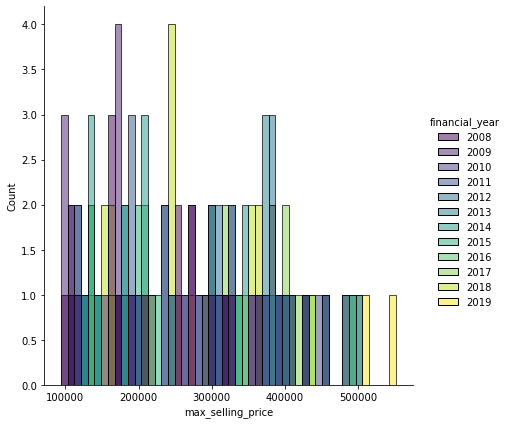

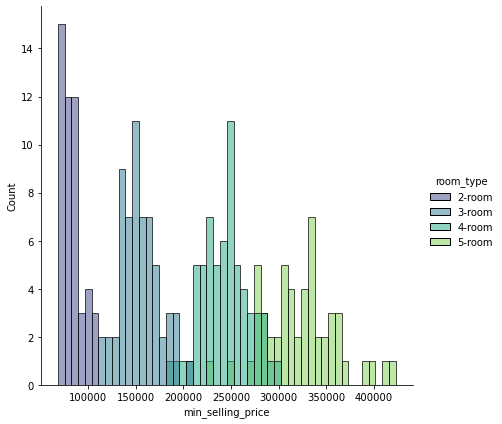

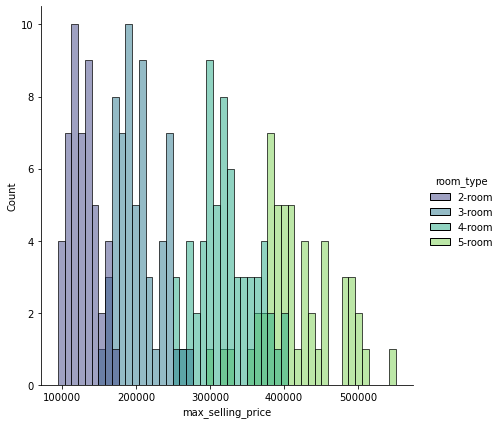

In [246]:
sns.displot(data = df, x='min_selling_price',bins=50, hue='financial_year',palette='viridis',height=6)
sns.displot(data = df, x='max_selling_price',bins=50, hue='financial_year',palette='viridis',height=6)
sns.displot(data = df, x='min_selling_price',bins=50, hue='room_type',palette='viridis',height=6)
sns.displot(data = df, x='max_selling_price',bins=50, hue='room_type',palette='viridis',height=6)

In [247]:
df.corr()['min_selling_price'].sort_values()

financial_year                    0.162318
max_selling_price_less_ahg_shg    0.825945
min_selling_price_less_ahg_shg    0.873046
max_selling_price                 0.972155
min_selling_price                 1.000000
Name: min_selling_price, dtype: float64

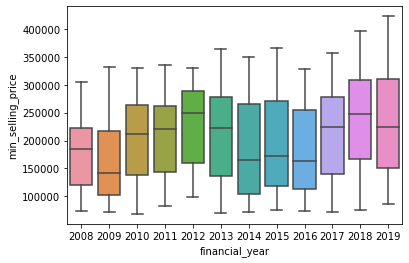

In [248]:
sns.boxplot(x='financial_year',y='min_selling_price',data=df)
plt.savefig('boxplot.png')

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   financial_year                  225 non-null    int64 
 1   town                            225 non-null    object
 2   room_type                       225 non-null    object
 3   min_selling_price               225 non-null    int64 
 4   max_selling_price               225 non-null    int64 
 5   min_selling_price_less_ahg_shg  225 non-null    int64 
 6   max_selling_price_less_ahg_shg  225 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 24.1+ KB


In [250]:
df.iloc[:,3:5].median(axis=1)

0       94500.0
1      173000.0
2      275000.0
3      366500.0
4      151000.0
         ...   
228    459500.0
229    107000.0
230    179500.0
231    269500.0
232    359500.0
Length: 225, dtype: float64

In [251]:
df.insert(3, column='Price', value=df.iloc[:,3:5].median(axis=1))

In [252]:
df.drop(['min_selling_price','max_selling_price'],inplace=True,axis=1)

In [253]:
df.insert(4, column='ahg_shg_price', value=df.iloc[:,4:6].median(axis=1))

In [254]:
df.drop(['min_selling_price_less_ahg_shg','max_selling_price_less_ahg_shg'],inplace=True,axis=1)

In [255]:
df.insert(4, column='ahg_shg_reduce', value=df['Price'] - df['ahg_shg_price'])

In [256]:
df.drop(['ahg_shg_price'],inplace=True,axis=1)

In [257]:
df[df['Price'] == df['ahg_shg_reduce']]

,financial_year,town,room_type,Price,ahg_shg_reduce
0,2008,Punggol,2-room,94500.0,94500.0
1,2008,Punggol,3-room,173000.0,173000.0
2,2008,Punggol,4-room,275000.0,275000.0
3,2008,Punggol,5-room,366500.0,366500.0
4,2008,Jurong West,3-room,151000.0,151000.0
5,2008,Jurong West,4-room,232000.0,232000.0
6,2008,Jurong West,5-room,274000.0,274000.0
7,2008,Bukit Panjang,2-room,94000.0,94000.0
8,2008,Bukit Panjang,3-room,154000.0,154000.0
9,2008,Bukit Panjang,4-room,240500.0,240500.0


In [258]:
#seems that ahg / shg grant was not tabulated / calculated during 2008 & 2009 or ahg / shg grant was not implemented as of yet.
#Decide to remove the two years so that the machine learning model will be more accurate.

In [259]:
df.drop(df[df['Price'] == df['ahg_shg_reduce']].index, inplace=True)

In [260]:
df[df['Price'] == df['ahg_shg_reduce']]

,financial_year,town,room_type,Price,ahg_shg_reduce


In [261]:
# Convert the Embarked training feature into dummies using one-hot
# and leave one first category to prevent perfect collinearity
town_dummied = pd.get_dummies(df['town'], prefix='town', drop_first=True)
room_type_dummied = pd.get_dummies(df['room_type'], prefix='room_type', drop_first=True)

df = pd.concat([df, town_dummied], axis=1)
df = pd.concat([df, room_type_dummied], axis=1)

In [262]:
df.drop(['town','room_type'],axis=1,inplace=True)

In [263]:
df

,financial_year,Price,ahg_shg_reduce,town_Bukit Panjang,town_Choa Chu Kang,town_Jurong West,town_Punggol,town_Sembawang,town_Sengkang,town_Tengah,town_Woodlands,town_Yishun,room_type_3-room,room_type_4-room,room_type_5-room
36,2010,193500.0,30000.0,0,0,0,1,0,0,0,0,0,1,0,0
37,2010,309500.0,10000.0,0,0,0,1,0,0,0,0,0,0,1,0
38,2010,394000.0,-0.5,0,0,0,1,0,0,0,0,0,0,0,1
39,2010,183500.0,30000.0,0,0,1,0,0,0,0,0,0,1,0,0
40,2010,282000.0,10000.0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,2019,459500.0,45000.0,0,0,0,0,0,0,1,0,0,0,0,1
229,2019,107000.0,80000.0,0,0,0,0,0,0,0,1,0,0,0,0
230,2019,179500.0,75000.0,0,0,0,0,0,0,0,1,0,1,0,0
231,2019,269500.0,60000.0,0,0,0,0,0,0,0,1,0,0,1,0


In [264]:
from sklearn.model_selection import train_test_split

In [265]:
X = df.drop('Price',axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [266]:
from sklearn.linear_model import LinearRegression

In [267]:
lm = LinearRegression()

In [268]:
lm.fit(X_train,y_train)

LinearRegression()

In [269]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 3.67668589e+03 -2.50746391e-01 -2.05492264e+04 -3.69988152e+04
 -5.57859680e+03  1.91523128e+04 -1.93453895e+04 -2.43083669e+03
  2.96446387e+04 -3.12998354e+04 -1.77100422e+04  7.84264007e+04
  1.81275251e+05  2.58773140e+05]


In [270]:
predictions = lm.predict(X_test)

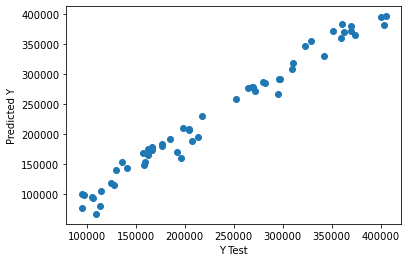

In [275]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.savefig('result2.png')

In [272]:
from sklearn import metrics
from sklearn.metrics import r2_score


print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', r2_score(y_test,predictions))

MAE: 11690.954481118963
MSE: 222145056.78074107
RMSE: 14904.531417684391
R2: 0.9750582954996662


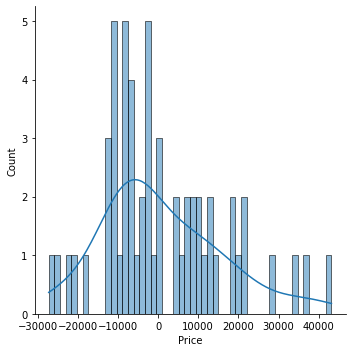

In [273]:
sns.displot((y_test-predictions),bins=50,kde=True);
plt.savefig('result.png')

In [274]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
financial_year,3676.685886
ahg_shg_reduce,-0.250746
town_Bukit Panjang,-20549.226350
town_Choa Chu Kang,-36998.815179
town_Jurong West,-5578.596804
town_Punggol,19152.312782
town_Sembawang,-19345.389495
town_Sengkang,-2430.836689
town_Tengah,29644.638655
town_Woodlands,-31299.835415


In [209]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 84 to 89
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   financial_year      57 non-null     int64  
 1   ahg_shg_reduce      57 non-null     float64
 2   town_Bukit Panjang  57 non-null     uint8  
 3   town_Choa Chu Kang  57 non-null     uint8  
 4   town_Jurong West    57 non-null     uint8  
 5   town_Punggol        57 non-null     uint8  
 6   town_Sembawang      57 non-null     uint8  
 7   town_Sengkang       57 non-null     uint8  
 8   town_Tengah         57 non-null     uint8  
 9   town_Woodlands      57 non-null     uint8  
 10  town_Yishun         57 non-null     uint8  
 11  room_type_3-room    57 non-null     uint8  
 12  room_type_4-room    57 non-null     uint8  
 13  room_type_5-room    57 non-null     uint8  
dtypes: float64(1), int64(1), uint8(12)
memory usage: 2.0 KB


In [218]:
details = {
    'financial_year' : ['2018'],
    'ahg_shg_reduce' : [3000],
    'town_Bukit Panjang' : [0],
    'town_Choa Chu Kang' : [0],
    'town_Jurong West' : [0],
    'town_Punggol' : [0],
    'town_Sembawang' : [1],
    'town_Sengkang' : [0],
    'town_Tengah' : [0],
    'town_Woodlands' : [0],
    'town_Yishun' : [0],
    'room_type_3-room ' : [0],
    'room_type_4-room' : [1],
    'room_type_5-room' : [0],
}
test_prediction = pd.DataFrame(details)

In [219]:
print(lm.predict(test_prediction))

[302106.20609094]
